<a href="https://colab.research.google.com/github/longhai2003/Timeseries/blob/main/TH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [30]:
df = pd.read_csv("household_power_consumption.csv")

In [31]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(subset=['datetime', 'Global_active_power'], inplace=True)

<ipython-input-31-10a20855c245>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')


In [32]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [33]:
df_hourly = df['Global_active_power'].resample('H').mean()
df_hourly.dropna(inplace=True)

<ipython-input-33-ce4d262ad62c>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


In [40]:
N = len(df_hourly)
T = 1.0
yf = fft(df_hourly.values)
xf = fftfreq(N, T)[:N//2]

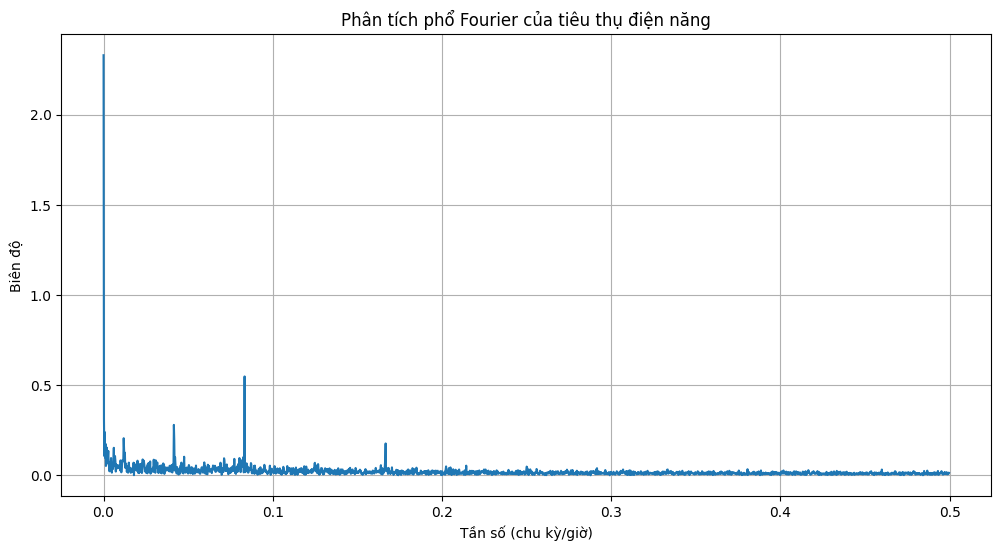

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Phân tích phổ Fourier của tiêu thụ điện năng")
plt.xlabel("Tần số (chu kỳ/giờ)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.show()

In [44]:
positive_freqs = xf[1:N//2]
positive_amplitudes = np.abs(yf[1:N//2])

dominant_index = np.argmax(positive_amplitudes)
dominant_freq = positive_freqs[dominant_index]

dominant_period_hours = 1 / dominant_freq
print(f" Chu kỳ chiếm ưu thế: khoảng {dominant_period_hours:.2f} giờ/lần")


 Chu kỳ chiếm ưu thế: khoảng 12.00 giờ/lần


In [37]:
df_hourly_by_hour = df_hourly.copy()
df_hourly_by_hour = df_hourly_by_hour.to_frame(name='power')
df_hourly_by_hour['hour'] = df_hourly_by_hour.index.hour
avg_by_hour = df_hourly_by_hour.groupby('hour')['power'].mean()

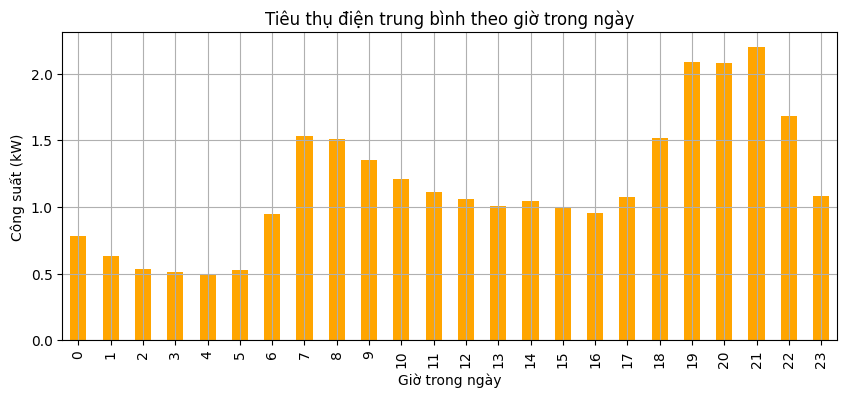

In [38]:
plt.figure(figsize=(10, 4))
avg_by_hour.plot(kind='bar', color='orange')
plt.title("Tiêu thụ điện trung bình theo giờ trong ngày")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Công suất (kW)")
plt.grid(True)
plt.show()

In [42]:
diennang = avg_by_hour.idxmax()
print(f" Giờ tiêu thụ điện cao nhất trung bình: {diennang} giờ")

 Giờ tiêu thụ điện cao nhất trung bình: 21 giờ
